<a href="https://colab.research.google.com/github/Revlyzl/BioActivity-Prediction-Model-and-Comparison/blob/main/Model_Building_and_Performance_Comparison_Bioinformatic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split
import time

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df_EGFR = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/UPDATED CODE & DATA Bio Colab (Final)/data/6_EGFR_Bioactivity_pIC50_Data_3class_pIC50_pubchem_fp.csv')
df_EGFR

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.387216
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.769551
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.031517
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.301030
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9503,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
9504,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.698970
9505,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.698970
9506,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000


In [ ]:
X_EGFR = df_EGFR.drop('pIC50', axis=1)
X_EGFR

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9503,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9504,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9505,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9506,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y_EGFR = df_EGFR.pIC50
Y_EGFR

0       7.387216
1       6.769551
2       5.031517
3       3.301030
4       2.522879
          ...   
9503    7.000000
9504    8.698970
9505    7.698970
9506    8.000000
9507    9.327902
Name: pIC50, Length: 9508, dtype: float64

In [ ]:
# Dictionary to store calculation times for each model
calculation_times = {}

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_EGFR = selection.fit_transform(X_EGFR)

In [ ]:
X_train_EGFR, X_test_EGFR, Y_train_EGFR, Y_test_EGFR = train_test_split(X_EGFR, Y_EGFR, test_size=0.2, random_state = 20)

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train_EGFR)

X_train_scaled_EGFR = scaler.transform(X_train_EGFR)
X_test_scaled_EGFR = scaler.transform(X_test_EGFR)

In [ ]:

input_dim_EGFR = X_train_scaled_EGFR.shape[1]
# input_dim_EGFR = X_train_scaled_EGFR.shape[880]

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=input_dim_EGFR, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


In [ ]:
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

start_time = time.time()

history = model.fit(X_train_scaled_EGFR, Y_train_EGFR, validation_split=0.2, epochs =100)

end_time = time.time()

calculation_times['Neural Network'] = end_time - start_time

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               19072     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 27395 (107.01 KB)
Trainable params: 27395 (107.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
191/191 [==============================] - 2s 5ms/step - loss: 7.0769 - mae: 1.8688 - val_loss: 1.7661 - val_mae: 1.0346
Epoch 2/100
191

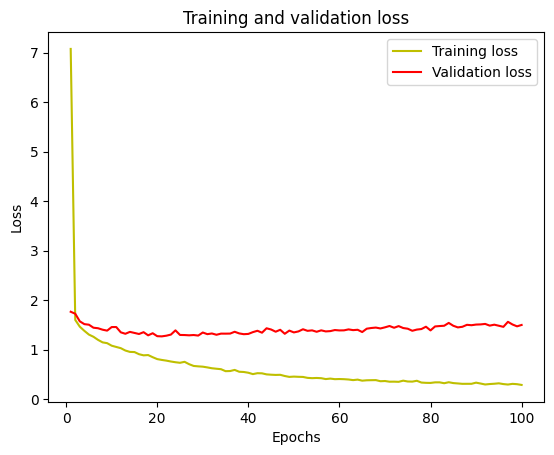

In [ ]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

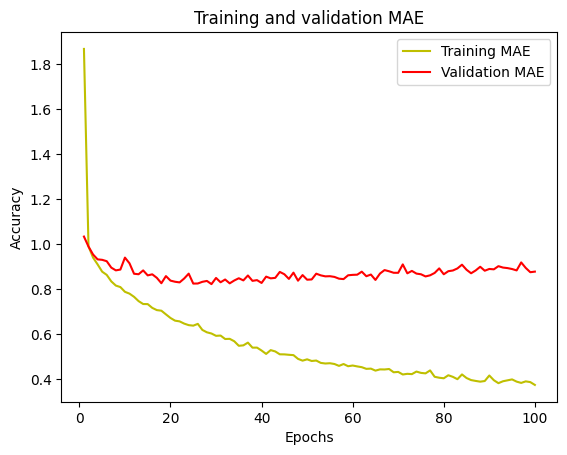

In [ ]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Predict on test data
predictions_EGFR = model.predict(X_test_scaled_EGFR)
print("Predicted values are: ", predictions_EGFR)
print("Real values are: ", Y_test_EGFR)

60/60 [==============================] - 0s 3ms/step
Predicted values are:  [[7.6159115]
 [7.1420083]
 [3.969681 ]
 ...
 [7.978285 ]
 [6.4661775]
 [8.297249 ]]
Real values are:  7113    7.008774
6938    7.301030
1239    4.000000
6534    7.000000
6064    6.619789
          ...   
5821    7.677781
6796    7.301030
4793    8.000000
5854    5.954677
7490    8.568636
Name: pIC50, Length: 1902, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate R-squared
def calculate_r_squared(y_true, y_pred):
    return r2_score(y_true, y_pred)

In [ ]:
#Neural network - from the current code
mse_neural_test, mae_neural_test = model.evaluate(X_test_scaled_EGFR, Y_test_EGFR)
mse_neural_train, mae_neural_train = model.evaluate(X_train_scaled_EGFR, Y_train_EGFR)
rmse_neural_train = calculate_rmse(Y_train_EGFR, model.predict(X_train_scaled_EGFR))
r2_neural_train = calculate_r_squared(Y_train_EGFR, model.predict(X_train_scaled_EGFR))
rmse_neural_test = calculate_rmse(Y_test_EGFR, predictions_EGFR)
r2_neural_test = calculate_r_squared(Y_test_EGFR, predictions_EGFR)


238/238 [==============================] - 0s 1ms/step


In [ ]:
# Neural Network
# MSE, MSE, RMSE, R-Squared on Test Set
print('Mean squared error from neural net on test set: ', mse_neural_test)
print('Mean absolute error from neural net on test set: ', mae_neural_test)
print('RMSE from neural net on test set: ', rmse_neural_test)
print('R-Squared from neural net on test set: ', r2_neural_test)

Mean squared error from neural net on test set:  1.4584261178970337
Mean absolute error from neural net on test set:  0.8812398314476013
RMSE from neural net on test set:  1.2076531412563518
R-Squared from neural net on test set:  0.3160440202316539


In [ ]:
#Neural Network
# MSE, MSE, RMSE, R-Squared on Train Set
print('Mean squared error from neural net on train set: ', mse_neural_train)
print('Mean absolute error from neural net on train set: ', mae_neural_train)
print('RMSE from neural net on train set: ', rmse_neural_train)
print('R-Squared from neural net on train set: ', r2_neural_train)

Mean squared error from neural net on train set:  0.5053296089172363
Mean absolute error from neural net on train set:  0.4601208567619324
RMSE from neural net on train set:  0.7108653777458933
R-Squared from neural net on train set:  0.7766352645486925


<function matplotlib.pyplot.show(close=None, block=None)>

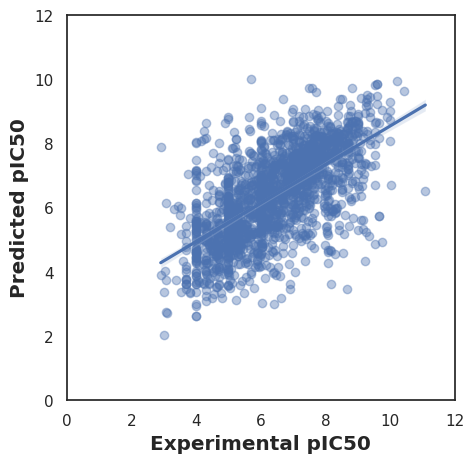

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test_EGFR, y=predictions_EGFR, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Linear Regression

In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Linear regression
lr_model_EGFR = linear_model.LinearRegression()

start_time = time.time()

lr_model_EGFR.fit(X_train_scaled_EGFR, Y_train_EGFR)

end_time = time.time()

calculation_times['Linear Regression'] = end_time - start_time

y_pred_lr_EGFR = lr_model_EGFR.predict(X_test_scaled_EGFR)

In [ ]:
# Evaluation Metric
mse_lr_train = mean_squared_error(Y_train_EGFR, lr_model_EGFR.predict(X_train_scaled_EGFR))
mae_lr_train = mean_absolute_error(Y_train_EGFR, lr_model_EGFR.predict(X_train_scaled_EGFR))
rmse_lr_train = calculate_rmse(Y_train_EGFR, lr_model_EGFR.predict(X_train_scaled_EGFR))
r2_lr_train = calculate_r_squared(Y_train_EGFR, lr_model_EGFR.predict(X_train_scaled_EGFR))

mse_lr_test = mean_squared_error(Y_test_EGFR, y_pred_lr_EGFR)
mae_lr_test = mean_absolute_error(Y_test_EGFR, y_pred_lr_EGFR)
rmse_lr_test = calculate_rmse(Y_test_EGFR, y_pred_lr_EGFR)
r2_lr_test = calculate_r_squared(Y_test_EGFR, y_pred_lr_EGFR)

In [ ]:
# Linear Evaluation Metric
# MSE, MSE, RMSE, R-Squared on Train Set
print('Mean squared error from Lineear Reg on train set: ', mse_lr_train)
print('Mean absolute error from Lineear Reg on train set: ', mae_lr_train)
print('RMSE from Lineear Reg on train set: ', rmse_lr_train)
print('R-Squared from Lineear Reg on train set: ', r2_lr_train)

Mean squared error from Lineear Reg on train set:  1.571705680609806
Mean absolute error from Lineear Reg on train set:  0.9772400436359775
RMSE from Lineear Reg on train set:  1.2536768645108698
R-Squared from Lineear Reg on train set:  0.3052779140890304


In [ ]:
# Linear Evaluation Metric
# MSE, MSE, RMSE, R-Squared on Test Set
print('Mean squared error from Linear Reg on test set: ', mse_lr_test)
print('Mean absolute error from Linear Regt on test set: ', mae_lr_test)
print('RMSE from Linear Reg on test set: ', rmse_lr_test)
print('R-Squared from Linear Reg on test set: ', r2_lr_test)

Mean squared error from Linear Reg on test set:  1.581799470404085
Mean absolute error from Linear Regt on test set:  0.9886999404503648
RMSE from Linear Reg on test set:  1.257696096202928
R-Squared from Linear Reg on test set:  0.25818579394184027


<function matplotlib.pyplot.show(close=None, block=None)>

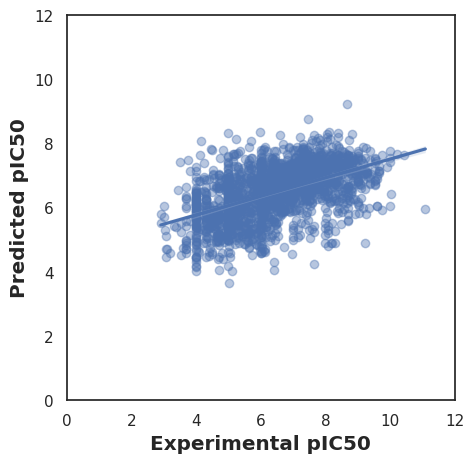

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test_EGFR, y=y_pred_lr_EGFR, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Decision Tree

In [ ]:
# Decision tree
tree_EGFR = DecisionTreeRegressor()

start_time = time.time()

tree_EGFR.fit(X_train_scaled_EGFR, Y_train_EGFR)

end_time = time.time()
calculation_times['Decision Tree'] = end_time - start_time

Y_pred_tree_EGFR = tree_EGFR.predict(X_test_scaled_EGFR)
mse_dt = mean_squared_error(Y_test_EGFR, Y_pred_tree_EGFR)
mae_dt = mean_absolute_error(Y_test_EGFR, Y_pred_tree_EGFR)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  1.9189268986366241
Mean absolute error using decision tree:  0.9341768117004378


In [ ]:
# Train Set
mse_dt_train = mean_squared_error(Y_train_EGFR, tree_EGFR.predict(X_train_scaled_EGFR))
mae_dt_train = mean_absolute_error(Y_train_EGFR, tree_EGFR.predict(X_train_scaled_EGFR))
rmse_dt_train = calculate_rmse(Y_train_EGFR, tree_EGFR.predict(X_train_scaled_EGFR))
r2_dt_train = calculate_r_squared(Y_train_EGFR, tree_EGFR.predict(X_train_scaled_EGFR))

# Test Set
mse_dt_test = mean_squared_error(Y_test_EGFR, Y_pred_tree_EGFR)
mae_dt_test = mean_absolute_error(Y_test_EGFR, Y_pred_tree_EGFR)
rmse_dt_test = calculate_rmse(Y_test_EGFR, Y_pred_tree_EGFR)
r2_dt_test = calculate_r_squared(Y_test_EGFR, Y_pred_tree_EGFR)

In [ ]:
# Decison Tree Evaluation Metric
# MSE, MSE, RMSE, R-Squared on Train Set
print('Mean squared error from decision tree on train set: ', mse_dt_train)
print('Mean absolute error from decision tree on train set: ', mae_dt_train)
print('RMSE from decision tree on train set: ', rmse_dt_train)
print('R-Squared from decision tree on train set: ', r2_dt_train)

Mean squared error from decision tree on train set:  0.13758106634097772
Mean absolute error from decision tree on train set:  0.14470400345110615
RMSE from decision tree on train set:  0.370919218079864
R-Squared from decision tree on train set:  0.939186702339095


In [ ]:
# Decison Tree Evaluation Metric
# MSE, MSE, RMSE, R-Squared on Test Set
print('Mean squared error from decision tree on test set: ', mse_dt_test)
print('Mean absolute error from decision tree on test set: ', mae_dt_test)
print('RMSE from decision tree on test set: ', rmse_dt_test)
print('R-Squared from decision tree on test set: ', r2_dt_test)

Mean squared error from decision tree on test set:  1.9189268986366241
Mean absolute error from decision tree on test set:  0.9341768117004378
RMSE from decision tree on test set:  1.3852533698340619
R-Squared from decision tree on test set:  0.10008363232532169


<function matplotlib.pyplot.show(close=None, block=None)>

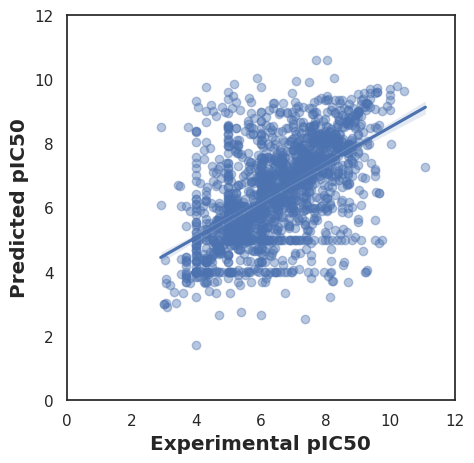

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test_EGFR, y=Y_pred_tree_EGFR, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Random Forest

In [ ]:
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30)
start_time = time.time()
model.fit(X_train_scaled_EGFR, Y_train_EGFR)
end_time = time.time()
calculation_times['Random Forest'] = end_time - start_time

In [ ]:
Y_pred_RF_EGFR = model.predict(X_test_scaled_EGFR)

In [ ]:
# Train
mse_RF_train = mean_squared_error(Y_train_EGFR, model.predict(X_train_scaled_EGFR))
mae_RF_train = mean_absolute_error(Y_train_EGFR, model.predict(X_train_scaled_EGFR))
rmse_RF_train = calculate_rmse(Y_train_EGFR, model.predict(X_train_scaled_EGFR))
r2_RF_train = calculate_r_squared(Y_train_EGFR, model.predict(X_train_scaled_EGFR))

# Test
mse_RF_test = mean_squared_error(Y_test_EGFR, Y_pred_RF_EGFR)
mae_RF_test = mean_absolute_error(Y_test_EGFR, Y_pred_RF_EGFR)
rmse_RF_test = calculate_rmse(Y_test_EGFR, Y_pred_RF_EGFR)
r2_RF_test = calculate_r_squared(Y_test_EGFR, Y_pred_RF_EGFR)

In [ ]:
# Random Forest Evaluation Metric
# MSE, MSE, RMSE, R-Squared on Train Set
print('Mean squared error from random forest on train set: ', mse_RF_train)
print('Mean absolute error from random forest on train set: ', mae_RF_train)
print('RMSE from random forest on train set: ', rmse_RF_train)
print('R-Squared from random forest on train set: ', r2_RF_train)

Mean squared error from random forest on train set:  0.26618846932977536
Mean absolute error from random forest on train set:  0.347385969510936
RMSE from random forest on train set:  0.5159345591543324
R-Squared from random forest on train set:  0.882339924745656


In [ ]:
# Random Forest Evaluation Metric
# MSE, MSE, RMSE, R-Squared on Test Set
print('Mean squared error from random forest on test set: ', mse_RF_test)
print('Mean absolute error from random forest on test set: ', mae_RF_test)
print('RMSE from random forest on test set: ', rmse_RF_test)
print('R-Squared from random forest on test set: ', r2_RF_test)

Mean squared error from random forest on test set:  1.0965661842537302
Mean absolute error from random forest on test set:  0.7496217832198335
RMSE from random forest on test set:  1.0471705612046827
R-Squared from random forest on test set:  0.4857449451828405


<function matplotlib.pyplot.show(close=None, block=None)>

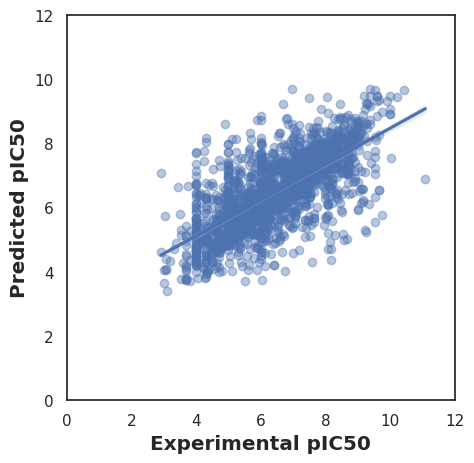

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test_EGFR, y=Y_pred_RF_EGFR, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Lasso

In [ ]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso_model = Lasso(alpha=0.1)

start_time = time.time()

lasso_model.fit(X_train_scaled_EGFR, Y_train_EGFR)

end_time = time.time()
calculation_times['Lasso Regression'] = end_time - start_time

y_pred_lasso = lasso_model.predict(X_test_scaled_EGFR)

In [ ]:
# Train
mse_lasso_train = mean_squared_error(Y_train_EGFR, lasso_model.predict(X_train_scaled_EGFR))
mae_lasso_train = mean_absolute_error(Y_train_EGFR, lasso_model.predict(X_train_scaled_EGFR))
rmse_lasso_train = calculate_rmse(Y_train_EGFR, lasso_model.predict(X_train_scaled_EGFR))
r2_lasso_train = calculate_r_squared(Y_train_EGFR, lasso_model.predict(X_train_scaled_EGFR))

# Test
mse_lasso_test = mean_squared_error(Y_test_EGFR, y_pred_lasso)
mae_lasso_test = mean_absolute_error(Y_test_EGFR, y_pred_lasso)
rmse_lasso_test = calculate_rmse(Y_test_EGFR, y_pred_lasso)
r2_lasso_test = calculate_r_squared(Y_test_EGFR, y_pred_lasso)

In [ ]:
# Lasso Regression Evaluation Metric
# MSE, MSE, RMSE, R-Squared on Train Set
print('Mean squared error from lasso regression on train set: ', mse_lasso_train)
print('Mean absolute error from lasso regression on train set: ', mae_lasso_train)
print('RMSE from lasso regression on train set: ', rmse_lasso_train)
print('R-Squared from lasso regression on train set: ', r2_lasso_train)

Mean squared error from lasso regression on train set:  1.8573876685677977
Mean absolute error from lasso regression on train set:  1.0967130627872381
RMSE from lasso regression on train set:  1.362860106015213
R-Squared from lasso regression on train set:  0.17900135415169882


In [ ]:
# Lasso Regression Evaluation Metric
# MSE, MSE, RMSE, R-Squared on Test Set
print('Mean squared error from lasso regression on test set: ', mse_lasso_test)
print('Mean absolute error from lasso regression on test set: ', mae_lasso_test)
print('RMSE from lasso regression on test set: ', rmse_lasso_test)
print('R-Squared from lasso regression on test set: ', r2_lasso_test)

Mean squared error from lasso regression on test set:  1.7508895785990835
Mean absolute error from lasso regression on test set:  1.0735989961803287
RMSE from lasso regression on test set:  1.3232118419206667
R-Squared from lasso regression on test set:  0.17888785086507475


<function matplotlib.pyplot.show(close=None, block=None)>

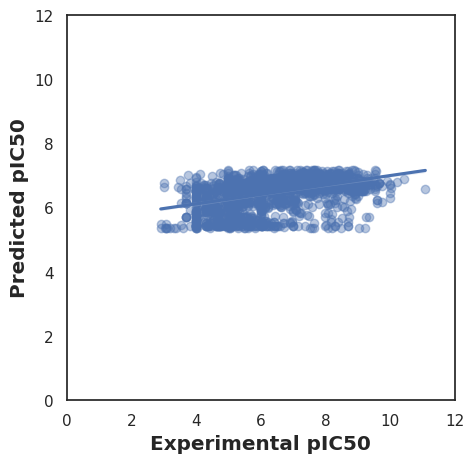

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test_EGFR, y=y_pred_lasso, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# SVM

In [ ]:
from sklearn.svm import SVR

# Support Vector Machine (SVM)
svm_model = SVR(kernel='linear')

start_time = time.time()

svm_model.fit(X_train_scaled_EGFR, Y_train_EGFR)

end_time = time.time()
calculation_times['Support Vector Machine'] = end_time - start_time

y_pred_svm = svm_model.predict(X_test_scaled_EGFR)

In [ ]:
# Train
mse_svm_train = mean_squared_error(Y_train_EGFR, svm_model.predict(X_train_scaled_EGFR))
mae_svm_train = mean_absolute_error(Y_train_EGFR, svm_model.predict(X_train_scaled_EGFR))
rmse_svm_train = calculate_rmse(Y_train_EGFR, svm_model.predict(X_train_scaled_EGFR))
r2_svm_train = calculate_r_squared(Y_train_EGFR, svm_model.predict(X_train_scaled_EGFR))

# Test
mse_svm_test = mean_squared_error(Y_test_EGFR, y_pred_svm)
mae_svm_test = mean_absolute_error(Y_test_EGFR, y_pred_svm)
rmse_svm_test = calculate_rmse(Y_test_EGFR, y_pred_svm)
r2_svm_test = calculate_r_squared(Y_test_EGFR, y_pred_svm)

In [ ]:
# SVM Evaluation Metric
# MSE, MSE, RMSE, R-Squared on Train Set
print('Mean squared error from SVM on train set: ', mse_svm_train)
print('Mean absolute error from SVM on train set: ', mae_svm_train)
print('RMSE from SVM on train set: ', rmse_svm_train)
print('R-Squared from SVM on train set: ', r2_svm_train)

Mean squared error from SVM on train set:  1.6200936652526052
Mean absolute error from SVM on train set:  0.961644175145152
RMSE from SVM on train set:  1.2728290007902103
R-Squared from SVM on train set:  0.28388955745279876


In [ ]:
# SVM Evaluation Metric
# MSE, MSE, RMSE, R-Squared on Test Set
print('Mean squared error from SVM on test set: ', mse_svm_test)
print('Mean absolute error from SVM on test set: ', mae_svm_test)
print('RMSE from SVM on test set: ', rmse_svm_test)
print('R-Squared from SVM on test set: ', r2_svm_test)

Mean squared error from SVM on test set:  1.6142853144180738
Mean absolute error from SVM on test set:  0.9759284931450567
RMSE from SVM on test set:  1.270545282317035
R-Squared from SVM on test set:  0.2429509547373424


<function matplotlib.pyplot.show(close=None, block=None)>

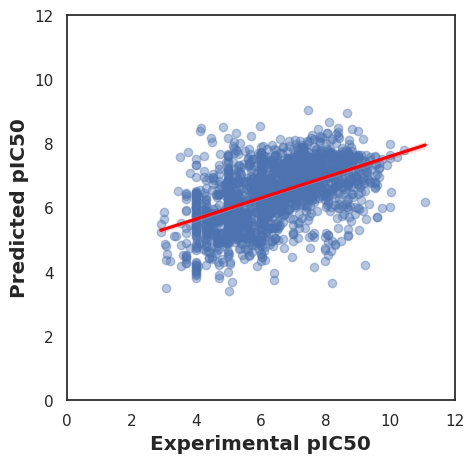

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

# Define keyword arguments for the regression line
line_kws = {'color': 'red'}

ax = sns.regplot(x=Y_test_EGFR, y=y_pred_svm, scatter_kws={'alpha':0.4}, line_kws=line_kws)
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

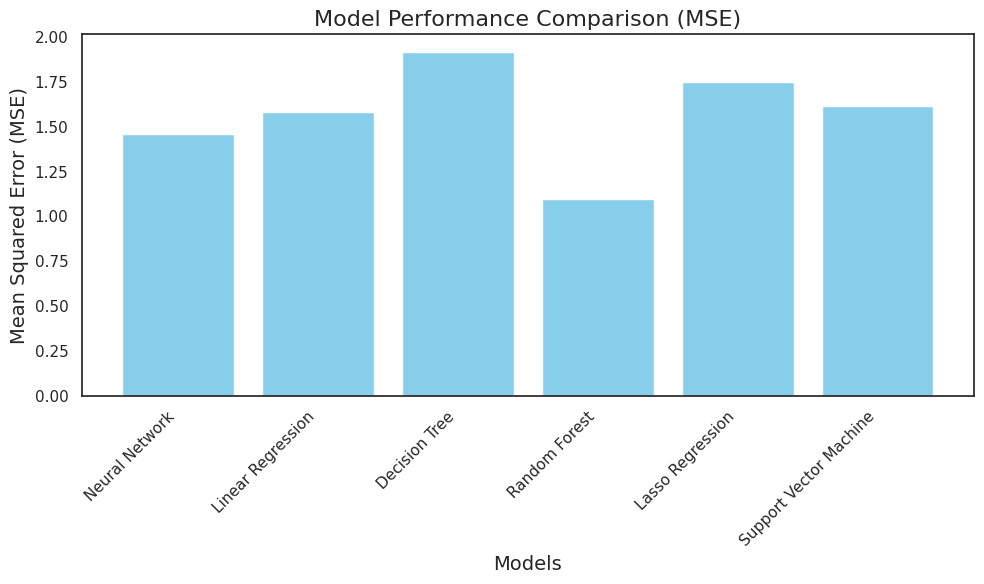

In [ ]:
import matplotlib.pyplot as plt

# Dictionary to store MSE values for each model
mse_dict = {
    'Neural Network': mse_neural_test,
    'Linear Regression': mse_lr_test,
    'Decision Tree': mse_dt_test,
    'Random Forest': mse_RF_test,
    'Lasso Regression': mse_lasso_test,
    'Support Vector Machine': mse_svm_test
}

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(mse_dict.keys(), mse_dict.values(), color='skyblue')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.title('Model Performance Comparison (MSE)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


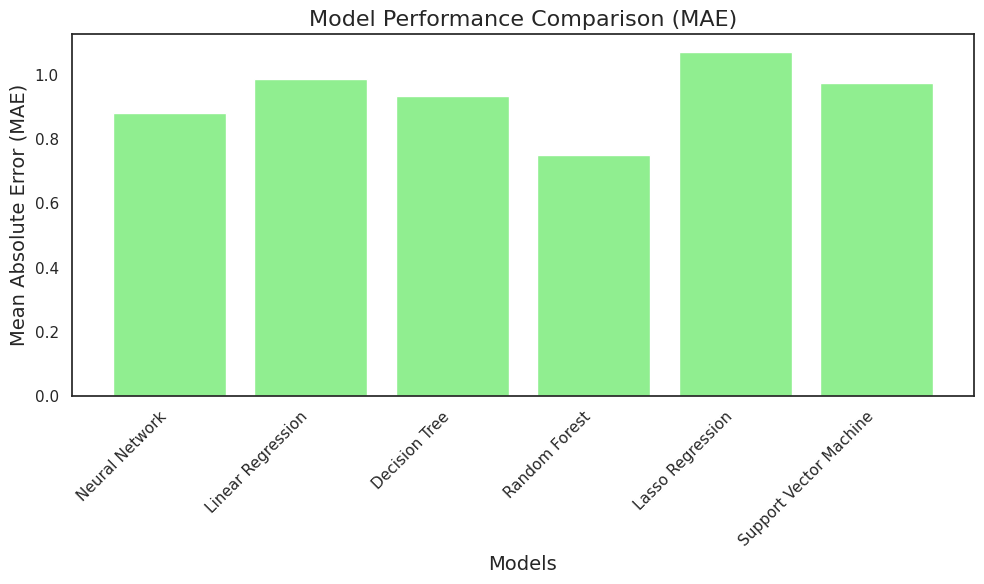

In [ ]:
# Dictionary to store MAE values for each model
mae_dict = {
    'Neural Network': mae_neural_test,
    'Linear Regression': mae_lr_test,
    'Decision Tree': mae_dt_test,
    'Random Forest': mae_RF_test,
    'Lasso Regression': mae_lasso_test,
    'Support Vector Machine': mae_svm_test
}

# Create bar plot for MAE
plt.figure(figsize=(10, 6))
plt.bar(mae_dict.keys(), mae_dict.values(), color='lightgreen')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=14)
plt.title('Model Performance Comparison (MAE)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

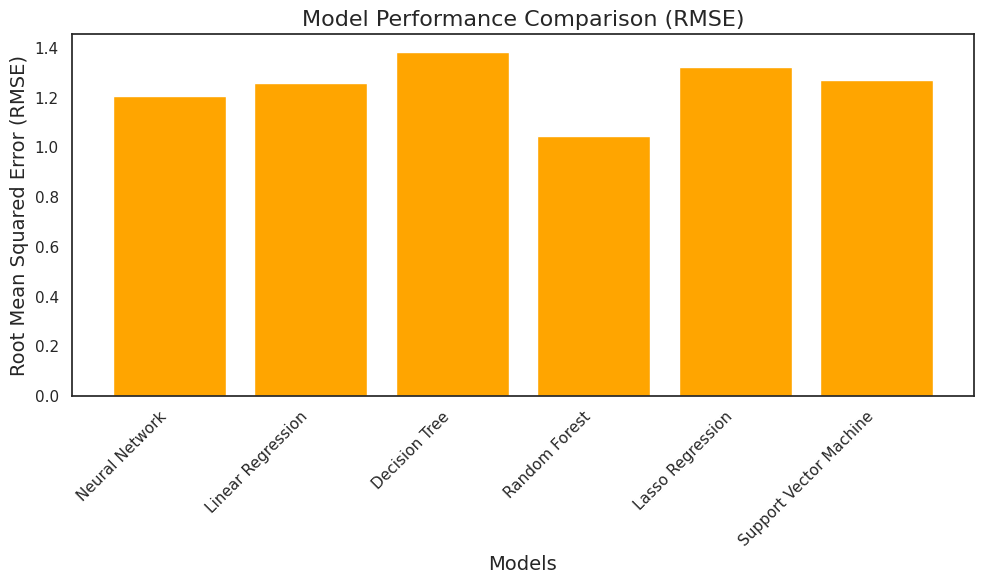

In [ ]:
# Dictionary to store RMSE values for each model
rmse_dict = {
    'Neural Network': rmse_neural_test,
    'Linear Regression': rmse_lr_test,
    'Decision Tree': rmse_dt_test,
    'Random Forest': rmse_RF_test,
    'Lasso Regression': rmse_lasso_test,
    'Support Vector Machine': rmse_svm_test
}

# Create bar plot for RMSE
plt.figure(figsize=(10, 6))
plt.bar(rmse_dict.keys(), rmse_dict.values(), color='orange')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Root Mean Squared Error (RMSE)', fontsize=14)
plt.title('Model Performance Comparison (RMSE)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


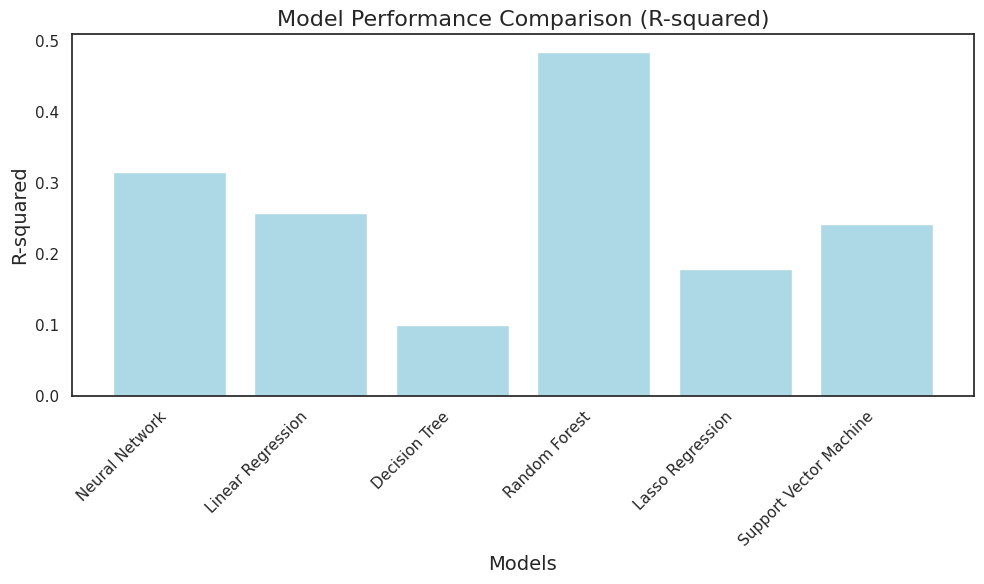

In [ ]:
# Dictionary to store R-squared values for each model
r2_dict = {
    'Neural Network': r2_neural_test,
    'Linear Regression': r2_lr_test,
    'Decision Tree': r2_dt_test,
    'Random Forest': r2_RF_test,
    'Lasso Regression': r2_lasso_test,
    'Support Vector Machine': r2_svm_test
}

# Create bar plot for R-squared
plt.figure(figsize=(10, 6))
plt.bar(r2_dict.keys(), r2_dict.values(), color='lightblue')
plt.xlabel('Models', fontsize=14)
plt.ylabel('R-squared', fontsize=14)
plt.title('Model Performance Comparison (R-squared)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# # Plot the calculation times on a logarithmic scale
# plt.figure(figsize=(10, 6))
# plt.bar(calculation_times.keys(), calculation_times.values(), color='red')
# plt.xlabel('Models', fontsize=14)
# plt.ylabel('Logarithmic Time (seconds)', fontsize=14)
# plt.title('Model Calculation Times', fontsize=16)
# plt.xticks(rotation=45, ha='right')

# # Set the y-axis scale to logarithmic
# plt.yscale('log')

# plt.tight_layout()
# plt.show()


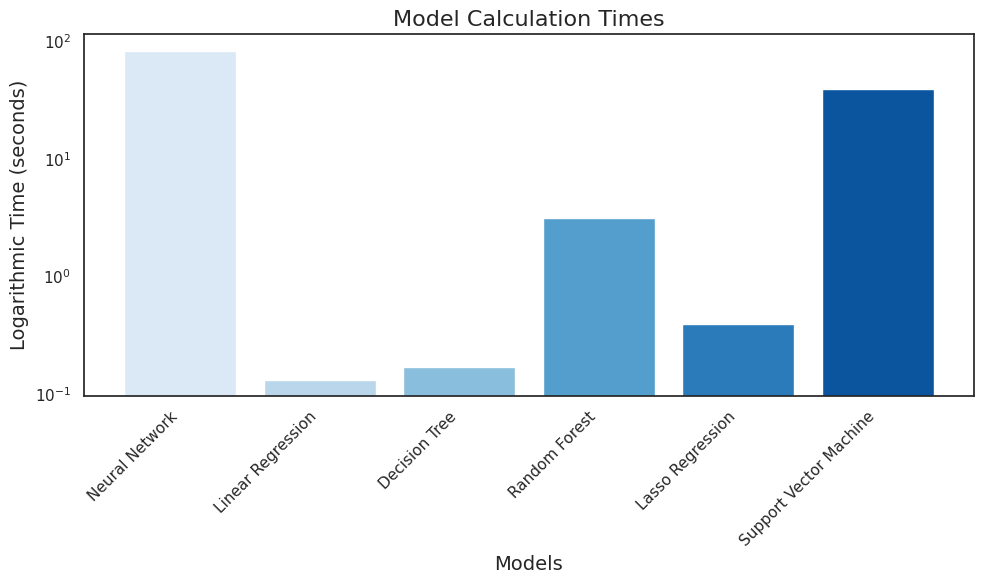

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the calculation times on a logarithmic scale
plt.figure(figsize=(10, 6))

# Use the "Blues" color palette from Seaborn
colors = sns.color_palette("Blues")

plt.bar(calculation_times.keys(), calculation_times.values(), color=colors)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Logarithmic Time (seconds)', fontsize=14)
plt.title('Model Calculation Times', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Set the y-axis scale to logarithmic
plt.yscale('log')

plt.tight_layout()
plt.show()


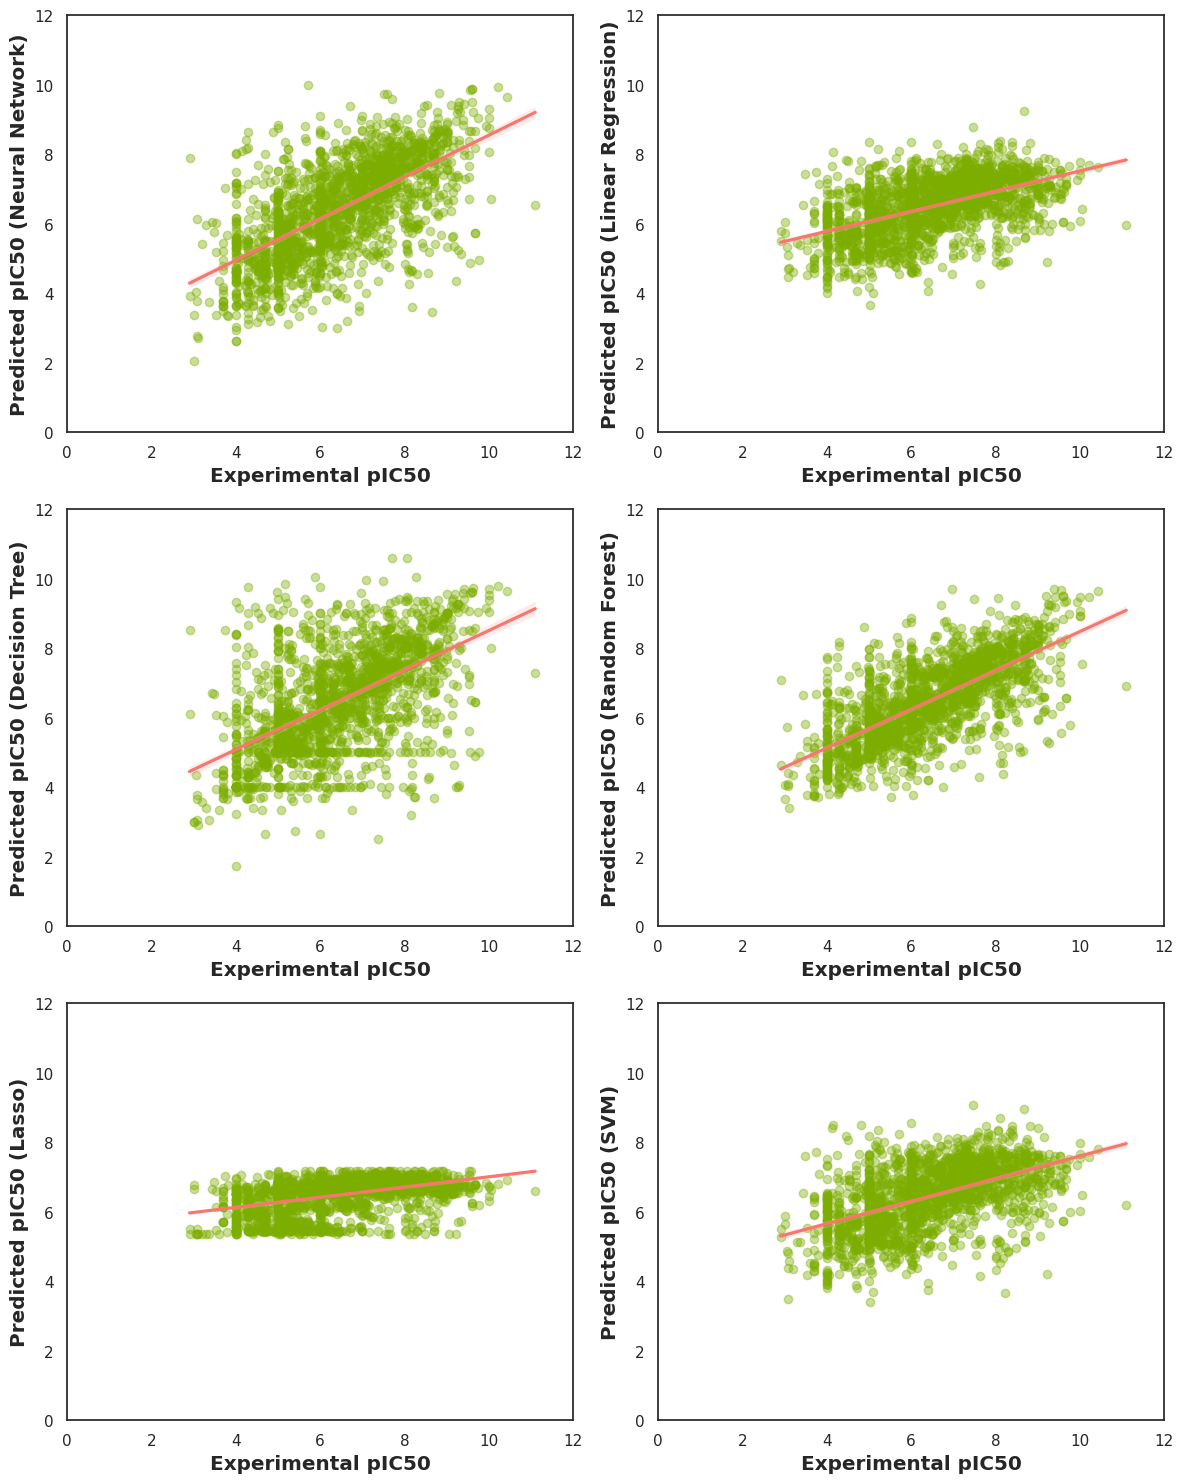

In [ ]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Neural Network Predictions
ax = axes[0, 0]
sns.regplot(x=Y_test_EGFR, y=predictions_EGFR, ax=ax, scatter_kws={'alpha': 0.4, 'color': '#7CAE00'}, line_kws={'color': '#F8766D'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50 (Neural Network)', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)

# Linear Regression Predictions
ax = axes[0, 1]
sns.regplot(x=Y_test_EGFR, y=y_pred_lr_EGFR, ax=ax, scatter_kws={'alpha': 0.4, 'color': '#7CAE00'}, line_kws={'color': '#F8766D'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50 (Linear Regression)', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)

# Decision Tree Predictions
ax = axes[1, 0]
sns.regplot(x=Y_test_EGFR, y=Y_pred_tree_EGFR, ax=ax, scatter_kws={'alpha': 0.4, 'color': '#7CAE00'}, line_kws={'color': '#F8766D'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50 (Decision Tree)', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)

# Random Forest Predictions
ax = axes[1, 1]
sns.regplot(x=Y_test_EGFR, y=Y_pred_RF_EGFR, ax=ax, scatter_kws={'alpha': 0.4, 'color': '#7CAE00'}, line_kws={'color': '#F8766D'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50 (Random Forest)', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)

# Lasso Predictions
ax = axes[2, 0]
sns.regplot(x=Y_test_EGFR, y=y_pred_lasso, ax=ax, scatter_kws={'alpha': 0.4, 'color': '#7CAE00'}, line_kws={'color': '#F8766D'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50 (Lasso)', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)

# SVM Predictions
ax = axes[2, 1]
sns.regplot(x=Y_test_EGFR, y=y_pred_svm, ax=ax, scatter_kws={'alpha': 0.4, 'color': '#7CAE00'}, line_kws={'color': '#F8766D'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50 (SVM)', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)

plt.tight_layout()
plt.show()


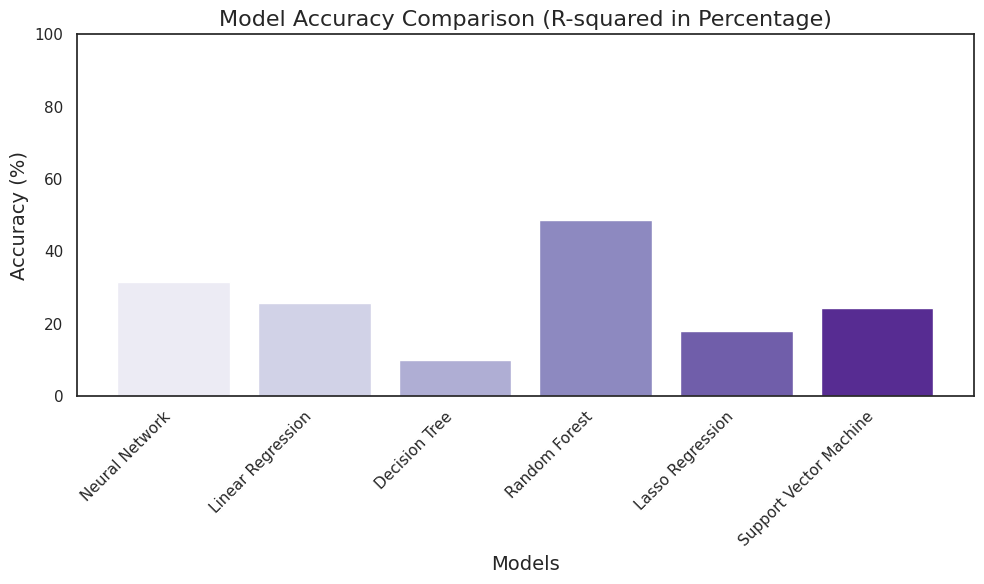

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store R-squared values for each model
r2_dict = {
    'Neural Network': r2_neural_test,
    'Linear Regression': r2_lr_test,
    'Decision Tree': r2_dt_test,
    'Random Forest': r2_RF_test,
    'Lasso Regression': r2_lasso_test,
    'Support Vector Machine': r2_svm_test
}

# Convert R-squared to percentage
accuracy_dict = {model: r2 * 100 for model, r2 in r2_dict.items()}

# Create bar plot for accuracy in percentage
plt.figure(figsize=(10, 6))

# Use the "Purples" color palette from Seaborn
colors = sns.color_palette("Purples", len(accuracy_dict))

plt.bar(accuracy_dict.keys(), accuracy_dict.values(), color=colors)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Model Accuracy Comparison (R-squared in Percentage)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Ensure the y-axis starts from 0 and ends at 100
plt.tight_layout()
plt.show()


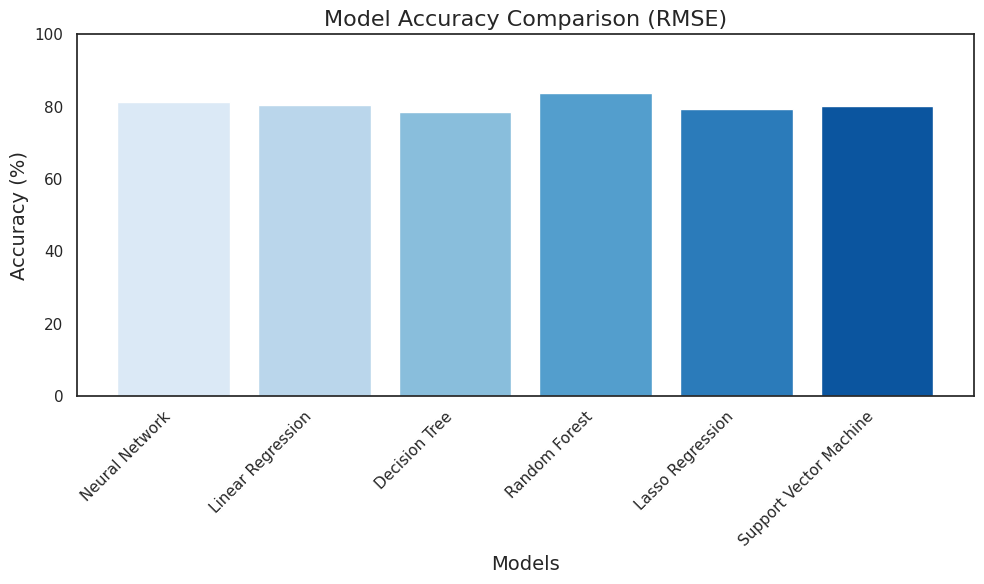

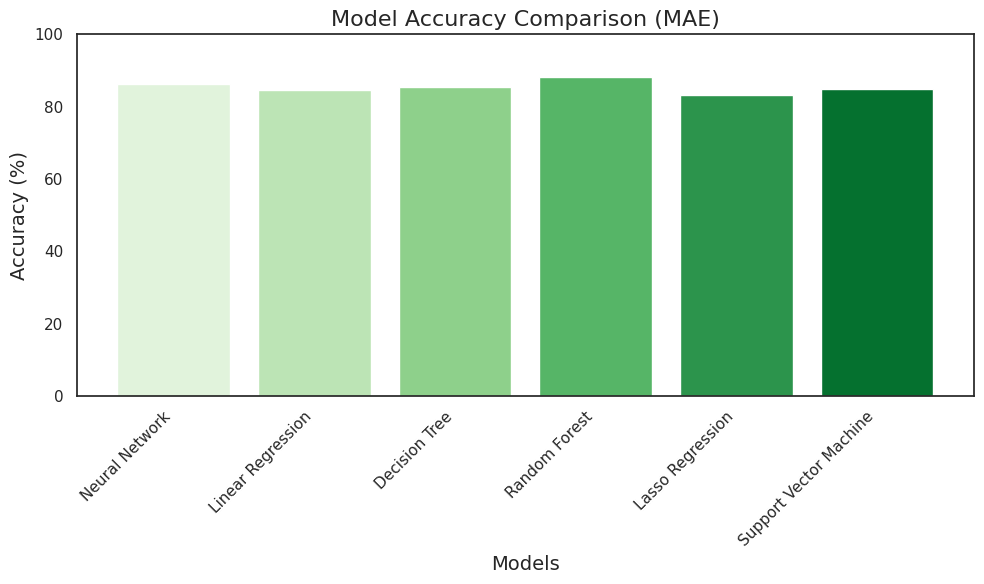

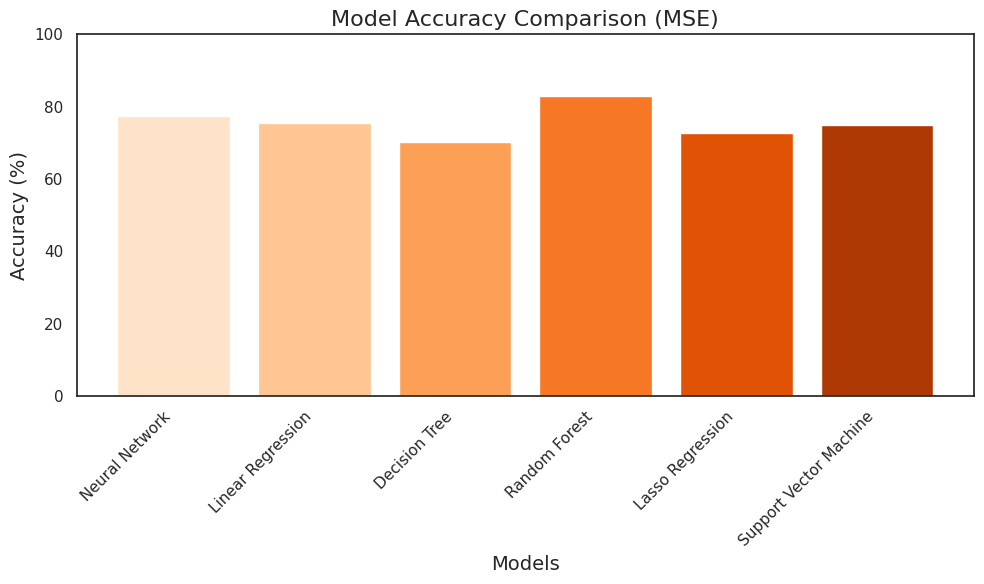

Model Accuracy Comparison:
Neural Network:
  R-squared: 31.60%
  RMSE: 81.21%
  MAE: 86.29%
  MSE: 77.31%
Linear Regression:
  R-squared: 25.82%
  RMSE: 80.43%
  MAE: 84.62%
  MSE: 75.39%
Decision Tree:
  R-squared: 10.01%
  RMSE: 78.45%
  MAE: 85.47%
  MSE: 70.15%
Random Forest:
  R-squared: 48.57%
  RMSE: 83.71%
  MAE: 88.34%
  MSE: 82.94%
Lasso Regression:
  R-squared: 17.89%
  RMSE: 79.41%
  MAE: 83.30%
  MSE: 72.76%
Support Vector Machine:
  R-squared: 24.30%
  RMSE: 80.23%
  MAE: 84.82%
  MSE: 74.88%


In [ ]:
# Calculate accuracy for RMSE, MAE, and MSE
accuracy_rmse_dict = {model: (1 - (rmse / Y_test_EGFR.mean())) * 100 for model, rmse in rmse_dict.items()}
accuracy_mae_dict = {model: (1 - (mae / Y_test_EGFR.mean())) * 100 for model, mae in mae_dict.items()}
accuracy_mse_dict = {model: (1 - (mse / Y_test_EGFR.mean())) * 100 for model, mse in mse_dict.items()}

# Display accuracy for RMSE
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Blues", len(accuracy_rmse_dict))
plt.bar(accuracy_rmse_dict.keys(), accuracy_rmse_dict.values(), color=colors)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Model Accuracy Comparison (RMSE)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Display accuracy for MAE
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Greens", len(accuracy_mae_dict))
plt.bar(accuracy_mae_dict.keys(), accuracy_mae_dict.values(), color=colors)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Model Accuracy Comparison (MAE)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Display accuracy for MSE
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Oranges", len(accuracy_mse_dict))
plt.bar(accuracy_mse_dict.keys(), accuracy_mse_dict.values(), color=colors)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Model Accuracy Comparison (MSE)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Display accuracy for all metrics
print("Model Accuracy Comparison:")
for model in accuracy_dict.keys():
    print(f"{model}:")
    print(f"  R-squared: {accuracy_dict[model]:.2f}%")
    print(f"  RMSE: {accuracy_rmse_dict[model]:.2f}%")
    print(f"  MAE: {accuracy_mae_dict[model]:.2f}%")
    print(f"  MSE: {accuracy_mse_dict[model]:.2f}%")
